In [ ]:
%matplotlib inline

# Monte Carlo, Aleatoriedade e Estatística

In [ ]:
import random

## `random.random`
Selecionando um número aleatório entre 0 e 1

In [ ]:
help(random.random)

In [ ]:
random.random()

In [ ]:
for _ in range(10):
    print(random.random())

Observe como rodar esse código várias vezes vai dar resultados diferentes todas as vezes - o mesmo vale para os exemplos a seguir

## `random.randint`

Selecionando um número inteiro numa faixa de números

In [ ]:
help(random.randint)

In [ ]:
for _ in range(10):
    print(random.randint(1, 1000))

## `random.choice`

Sorteando uma opção dentro de uma lista

In [ ]:
random.choice?

In [ ]:
opções_fds = ["Ficar em Casa", "Ir ao Shopping", "Ir num parque", "Viajar", "Visitar amigos", "Fazer uma festa em casa"]

for _ in range(3):
    print(random.choice(opções_fds))

In [ ]:
print(f"Nesse fim de semana vou: {random.choice(opções_fds)}")

## Sorteando Números que seguem alguma distribuição específica

Em estatística, podemos modelar fenômenos usando diversas distribuições diferentes - distribuição normal, de Poisson, Gama, etc. A biblioteca random permite sortear números que sigam uma distribuição em particular:

In [ ]:
random.gammavariate?

In [ ]:
random.normalvariate?

A melhor forma de exibir a diferença é fazendo um gráfico dos números sorteados por cada método:

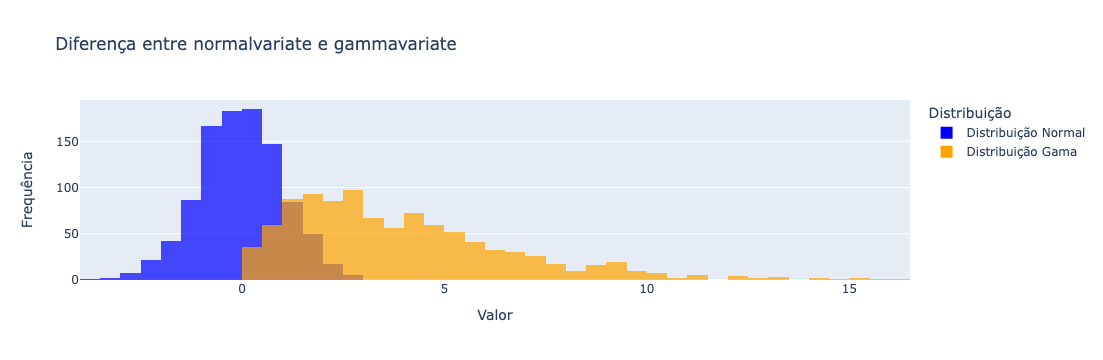

In [9]:
import random
import plotly.express as px

# Número de pontos para gerar
num_points = 1_000

# Gerar pontos usando normalvariate
normal_points = [random.normalvariate(0, 1) for _ in range(num_points)]

# Gerar pontos usando gammavariate
gamma_points = [random.gammavariate(2, 2) for _ in range(num_points)]

# Colocando os dados em um dicionário - isso vai colocar a 
data = {
    "Distribuição Normal": normal_points,
    "Distribuição Gama": gamma_points
}
# Criar uma figura interativa com Plotly
fig = px.histogram(
    data,
    labels={"x": "Valor"},
    title="Diferença entre normalvariate e gammavariate",
    opacity=0.7,
    color_discrete_sequence=["blue", "orange"],
    nbins=50,
    barmode="overlay"
)

# Personalizar o layout
fig.update_layout(
    xaxis_title="Valor",
    yaxis_title="Frequência",
    legend_title="Distribuição",
)

# Mostrar o gráfico interativo
fig.show()

O Método de Monte Carlo é uma abordagem estatística poderosa para estimar resultados complexos por meio de amostragens aleatórias. Ele se baseia em simular um grande número de cenários aleatórios para calcular aproximações numéricas. Isso é especialmente útil quando resolver problemas analiticamente é desafiador ou inviável. O método é amplamente aplicado em diversas áreas, como física, engenharia, finanças e ciências biológicas, permitindo a obtenção de insights valiosos em situações complexas e ajudando a tomar decisões informadas.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Draw the larger square
larger_square = patches.Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='black', facecolor='none')
ax.add_patch(larger_square)

# Calculate dimensions of the smaller square
smaller_side_length = 0.5
smaller_x = (1 - smaller_side_length) / 2
smaller_y = (1 - smaller_side_length) / 2

# Draw the smaller square
smaller_square = patches.Rectangle((smaller_x, smaller_y), smaller_side_length, smaller_side_length,
                                   linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(smaller_square)

# Set axis limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Set aspect ratio to be equal
ax.set_aspect('equal', adjustable='datalim')

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Set title
ax.set_title("Quadrado e quadrado com metade de área dentro")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
import random
from IPython.display import HTML


# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Draw a square
square = patches.Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='black', facecolor='none')
ax.add_patch(square)

# Draw a circle
circle = patches.Circle((0.5, 0.5), 0.5, linewidth=2, edgecolor='red', facecolor='#a99fa47d')
ax.add_patch(circle)

# Set axis limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Set aspect ratio to be equal
ax.set_aspect('equal', adjustable='datalim')

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Set title
ax.set_title("Animating Points within Circle")
ax.set_xlabel('Estimativa de pi: ')
# Scatter plot for animated points
sc = ax.scatter([], [], s=2)
points = []
colors = []
points_in = 0
def estimate_pi(points_total, points_in):
    return (points_in / points_total) * 4
# Animation update function
def update(frame):
    global points_in
    x = random.random()
    y = random.random()

    # Check if point is inside the circle
    points.append([x, y])
    if ((x - 0.5)**2 + (y - 0.5)**2) <= 0.5**2:
        points_in += 1
        colors.append((1, 0,0))
    else:
        colors.append((1, 0, 1))
        
    ax.set_title(f"Pontos sorteados: {len(points)}\nPontos dentro do círculo: {points_in}")
    pi_estimate = estimate_pi(len(points), points_in)
    ax.set_xlabel(f"Estimativa de pi: {pi_estimate}")
    sc.set_offsets(points)
    sc.set_facecolors(colors)



# Create animation
ani = FuncAnimation(fig, update, frames=range(998), interval=50)

HTML(ani.to_html5_video())

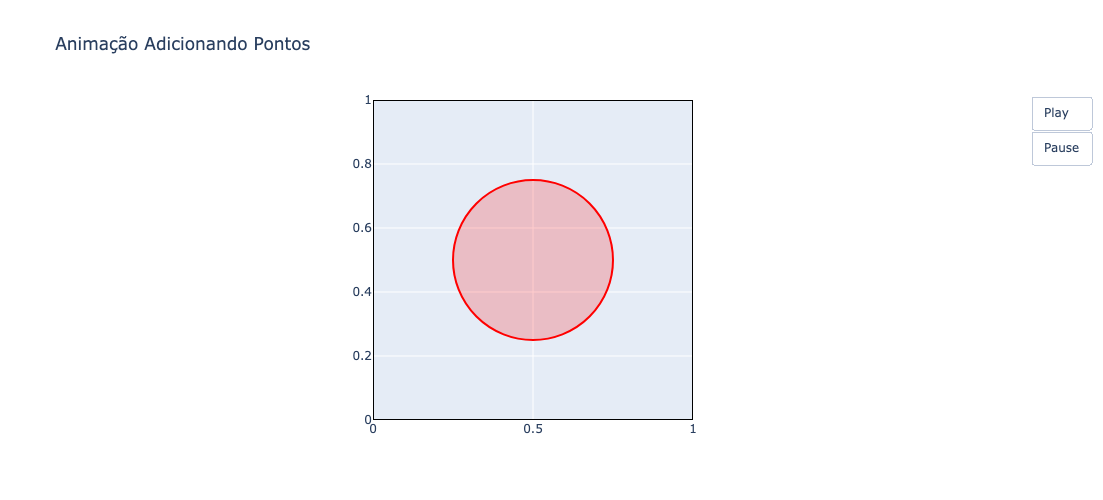

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import random

# Criar figura com quadrado e círculo
fig = make_subplots(rows=1, cols=1)
fig.add_shape(
    type="rect",
    x0=0, y0=0,
    x1=1, y1=1,
    line=dict(color="black"),
    fillcolor="rgba(0,0,0,0)",
)
fig.add_shape(
    type="circle",
    x0=0.25, y0=0.25,
    x1=0.75, y1=0.75,
    line=dict(color="red"),
    fillcolor="rgba(255,0,0,0.2)",
)

# Definir a animação
frames = []
num_frames = 30
for frame_num in range(num_frames + 1):
    x_points = [random.uniform(0.25, 0.75) for _ in range(frame_num)]
    y_points = [random.uniform(0.25, 0.75) for _ in range(frame_num)]
    scatter_trace = go.Scatter(
        x=x_points,
        y=y_points,
        mode="markers",
        marker=dict(size=8, color="blue"),
        showlegend=False,
    )
    frames.append(go.Frame(data=[scatter_trace]))

# Adicionar a animação à figura
fig.frames = frames

# Configurar o layout
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            showactive=False,
            x=1.05, y=0.8,
            xanchor="left", yanchor="bottom",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None, {"frame": {"duration": 100, "redraw": True}, "fromcurrent": True, "transition": {"duration": 0}}]),
                    dict(label="Pause",
                          method="animate",
                          args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}])]
        )
    ],
    xaxis=dict(range=[0, 1], scaleanchor="y", constrain="domain"),
    yaxis=dict(range=[0, 1]),
    width=500,
    height=500,
    title="Animação Adicionando Pontos",
)

# Mostrar figura
fig.show()
